In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

C:\Users\HShrestha\AppData\Local\Temp\ipykernel_25332\3939461007.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<AxesSubplot:>

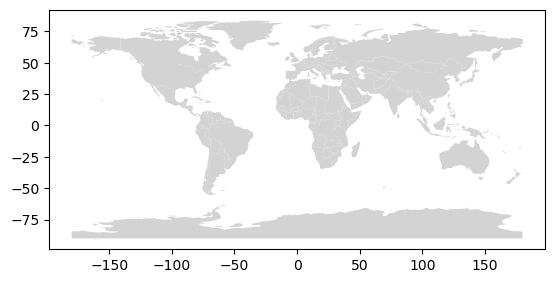

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(color = "lightgrey")

### Clipping

<AxesSubplot:>

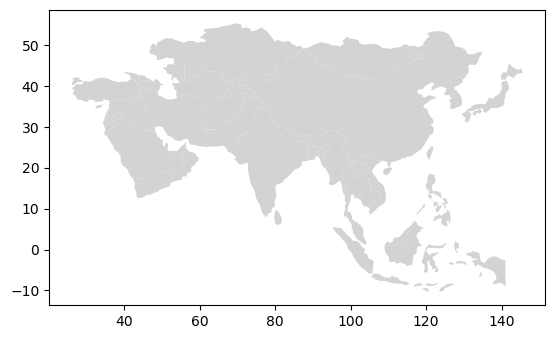

In [3]:
asia = world[world.continent == "Asia"]
asia.plot(color = "lightgrey")

In [4]:
south_asia_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                       "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

south_asia = asia[asia.name.isin(south_asia_countries)]

south_asia

pop_est continent         name iso_a3  gdp_md_est  \
98   1.366418e+09      Asia        India    IND     2868929   
99   1.630462e+08      Asia   Bangladesh    BGD      302571   
100  7.630920e+05      Asia       Bhutan    BTN        2530   
101  2.860871e+07      Asia        Nepal    NPL       30641   
102  2.165653e+08      Asia     Pakistan    PAK      278221   
103  3.804175e+07      Asia  Afghanistan    AFG       19291   
138  2.180300e+07      Asia    Sri Lanka    LKA       84008   

                                              geometry  
98   POLYGON ((97.32711 28.26158, 97.40256 27.88254...  
99   POLYGON ((92.67272 22.04124, 92.65226 21.32405...  
100  POLYGON ((91.69666 27.77174, 92.10371 27.45261...  
101  POLYGON ((88.12044 27.87654, 88.04313 27.44582...  
102  POLYGON ((77.83745 35.49401, 76.87172 34.65354...  
103  POLYGON ((66.51861 37.36278, 67.07578 37.35614...  
138  POLYGON ((81.78796 7.52306, 81.63732 6.48178, ...

<AxesSubplot:>

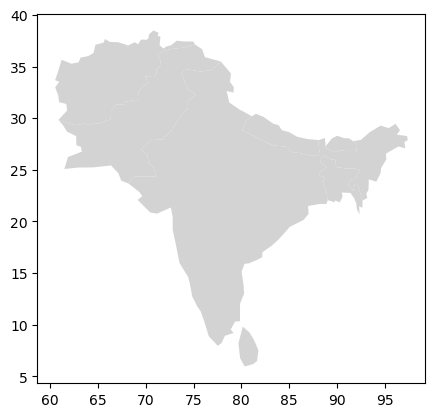

In [5]:
south_asia.plot(color = "lightgrey")

### Dissolving boudaries between countries in South Asia while summing up population and gdp

<AxesSubplot:>

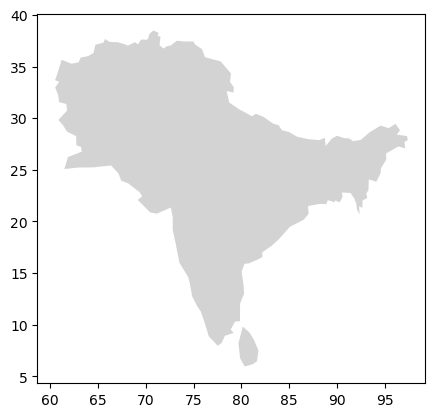

In [6]:
south_asia_dissolved = south_asia.dissolve(by = None,
                                          aggfunc = {"pop_est":"sum",
                                                    "gdp_md_est":"sum"})
south_asia_dissolved.plot(color = "lightgrey")

<AxesSubplot:>

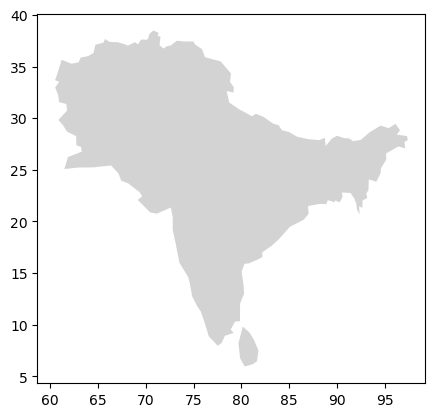

In [7]:
south_asia_dissolved = south_asia.dissolve(by = None,
                                          aggfunc = {"pop_est":"sum",
                                                    "gdp_md_est":"sum"})
south_asia_dissolved.plot(color = "lightgrey")

In [8]:
south_asia_dissolved

geometry       pop_est  gdp_md_est
0  MULTIPOLYGON (((81.21802 6.19714, 80.34836 5.9...  1.835246e+09     3586191

In [9]:
print (south_asia["pop_est"].sum())

print (south_asia["gdp_md_est"].sum())

1835245789.0
3586191


### Dissolving boundaries between countries in continents

In [10]:
world["num_countries"] = 1
world

pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  num_countries  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...              1  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...              1  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...              1  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...              1  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...              1  
..                                                 ...            ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...              1  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...              1  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...              1  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...              1  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...              1  

[177 rows x 7 columns]

In [11]:
world["num_countries"] = 1

continents_dissolved = world.dissolve(by = "continent",
                                    aggfunc = {"pop_est":"sum",
                                               "gdp_md_est":"sum",
                                              "num_countries":"count"}).reset_index()
continents_dissolved

continent                                           geometry  \
0                   Africa  MULTIPOLYGON (((-11.43878 6.78592, -11.70819 6...   
1               Antarctica  MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...   
2                     Asia  MULTIPOLYGON (((48.67923 14.00320, 48.23895 13...   
3                   Europe  MULTIPOLYGON (((-53.55484 2.33490, -53.77852 2...   
4            North America  MULTIPOLYGON (((-155.22217 19.23972, -155.5421...   
5                  Oceania  MULTIPOLYGON (((147.91405 -43.21152, 147.56456...   
6  Seven seas (open ocean)  POLYGON ((68.93500 -48.62500, 69.58000 -48.940...   
7            South America  MULTIPOLYGON (((-68.63999 -55.58002, -69.23210...   

        pop_est  gdp_md_est  num_countries  
0  1.306370e+09     2455514             51  
1  4.490000e+03         898              1  
2  4.550277e+09    32725478             47  
3  7.454125e+08    21587850             39  
4  5.837560e+08    25075988             18  
5  4.120487e+07     1647113              7  
6  1.400000e+02          16              1  
7  4.270667e+08     3852015             13

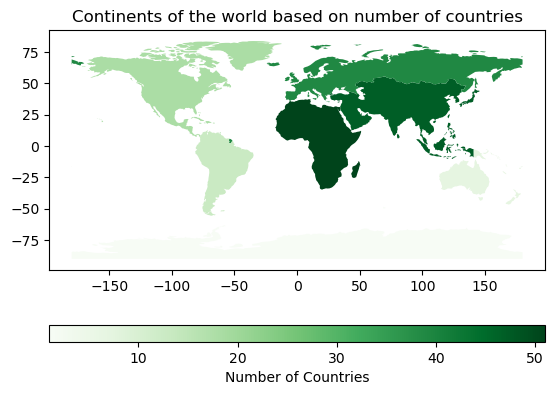

In [12]:
map = continents_dissolved.plot(column = "num_countries",
                         cmap = "Greens")

# Get the current axes
ax = plt.gca()

# Add a horizontal colorbar
cbar = plt.colorbar(map.get_children()[0],
                    ax=ax, 
                    orientation='horizontal',
                   aspect = 30   #control the width of color bar. higher value= lower width.
                   )

# Set a label for the colorbar
cbar.set_label('Number of Countries')

plt.title("Continents of the world based on number of countries")

plt.savefig("Continents dissolved.jpeg",
            bbox_inches = "tight",
           dpi = 300)

# Show the plot
plt.show()


In [13]:
continents_dissolved.to_file("continent/continents_dissolved.shp")

C:\Users\HShrestha\AppData\Local\Temp\ipykernel_25332\3798829215.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  continents_dissolved.to_file("continent/continents_dissolved.shp")


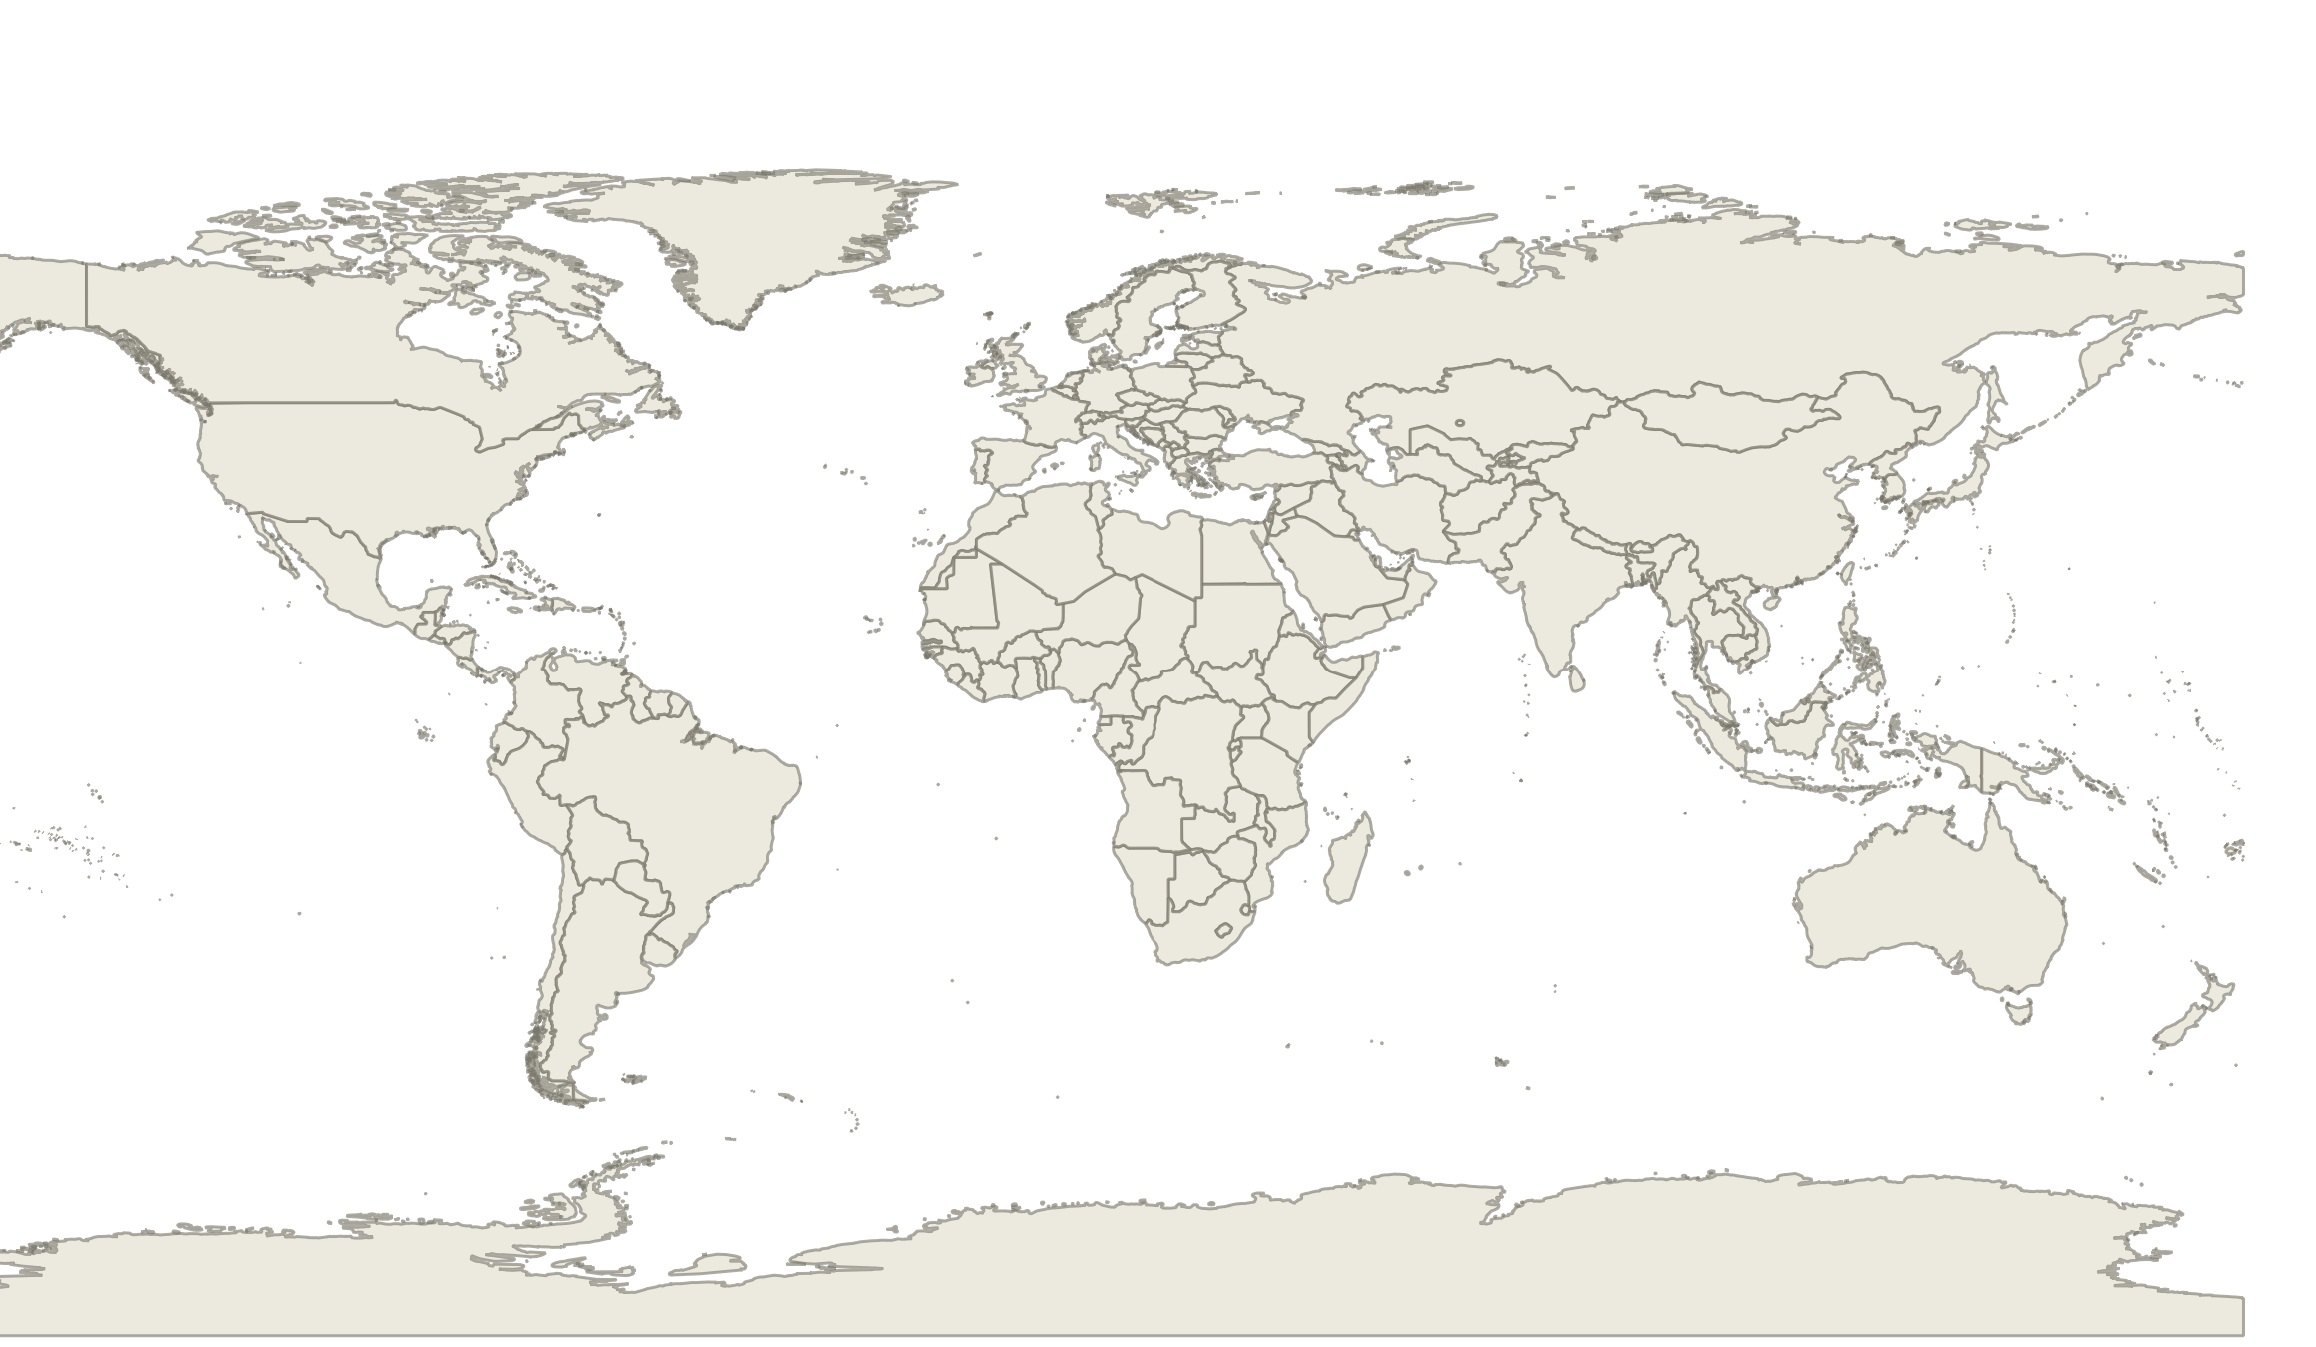

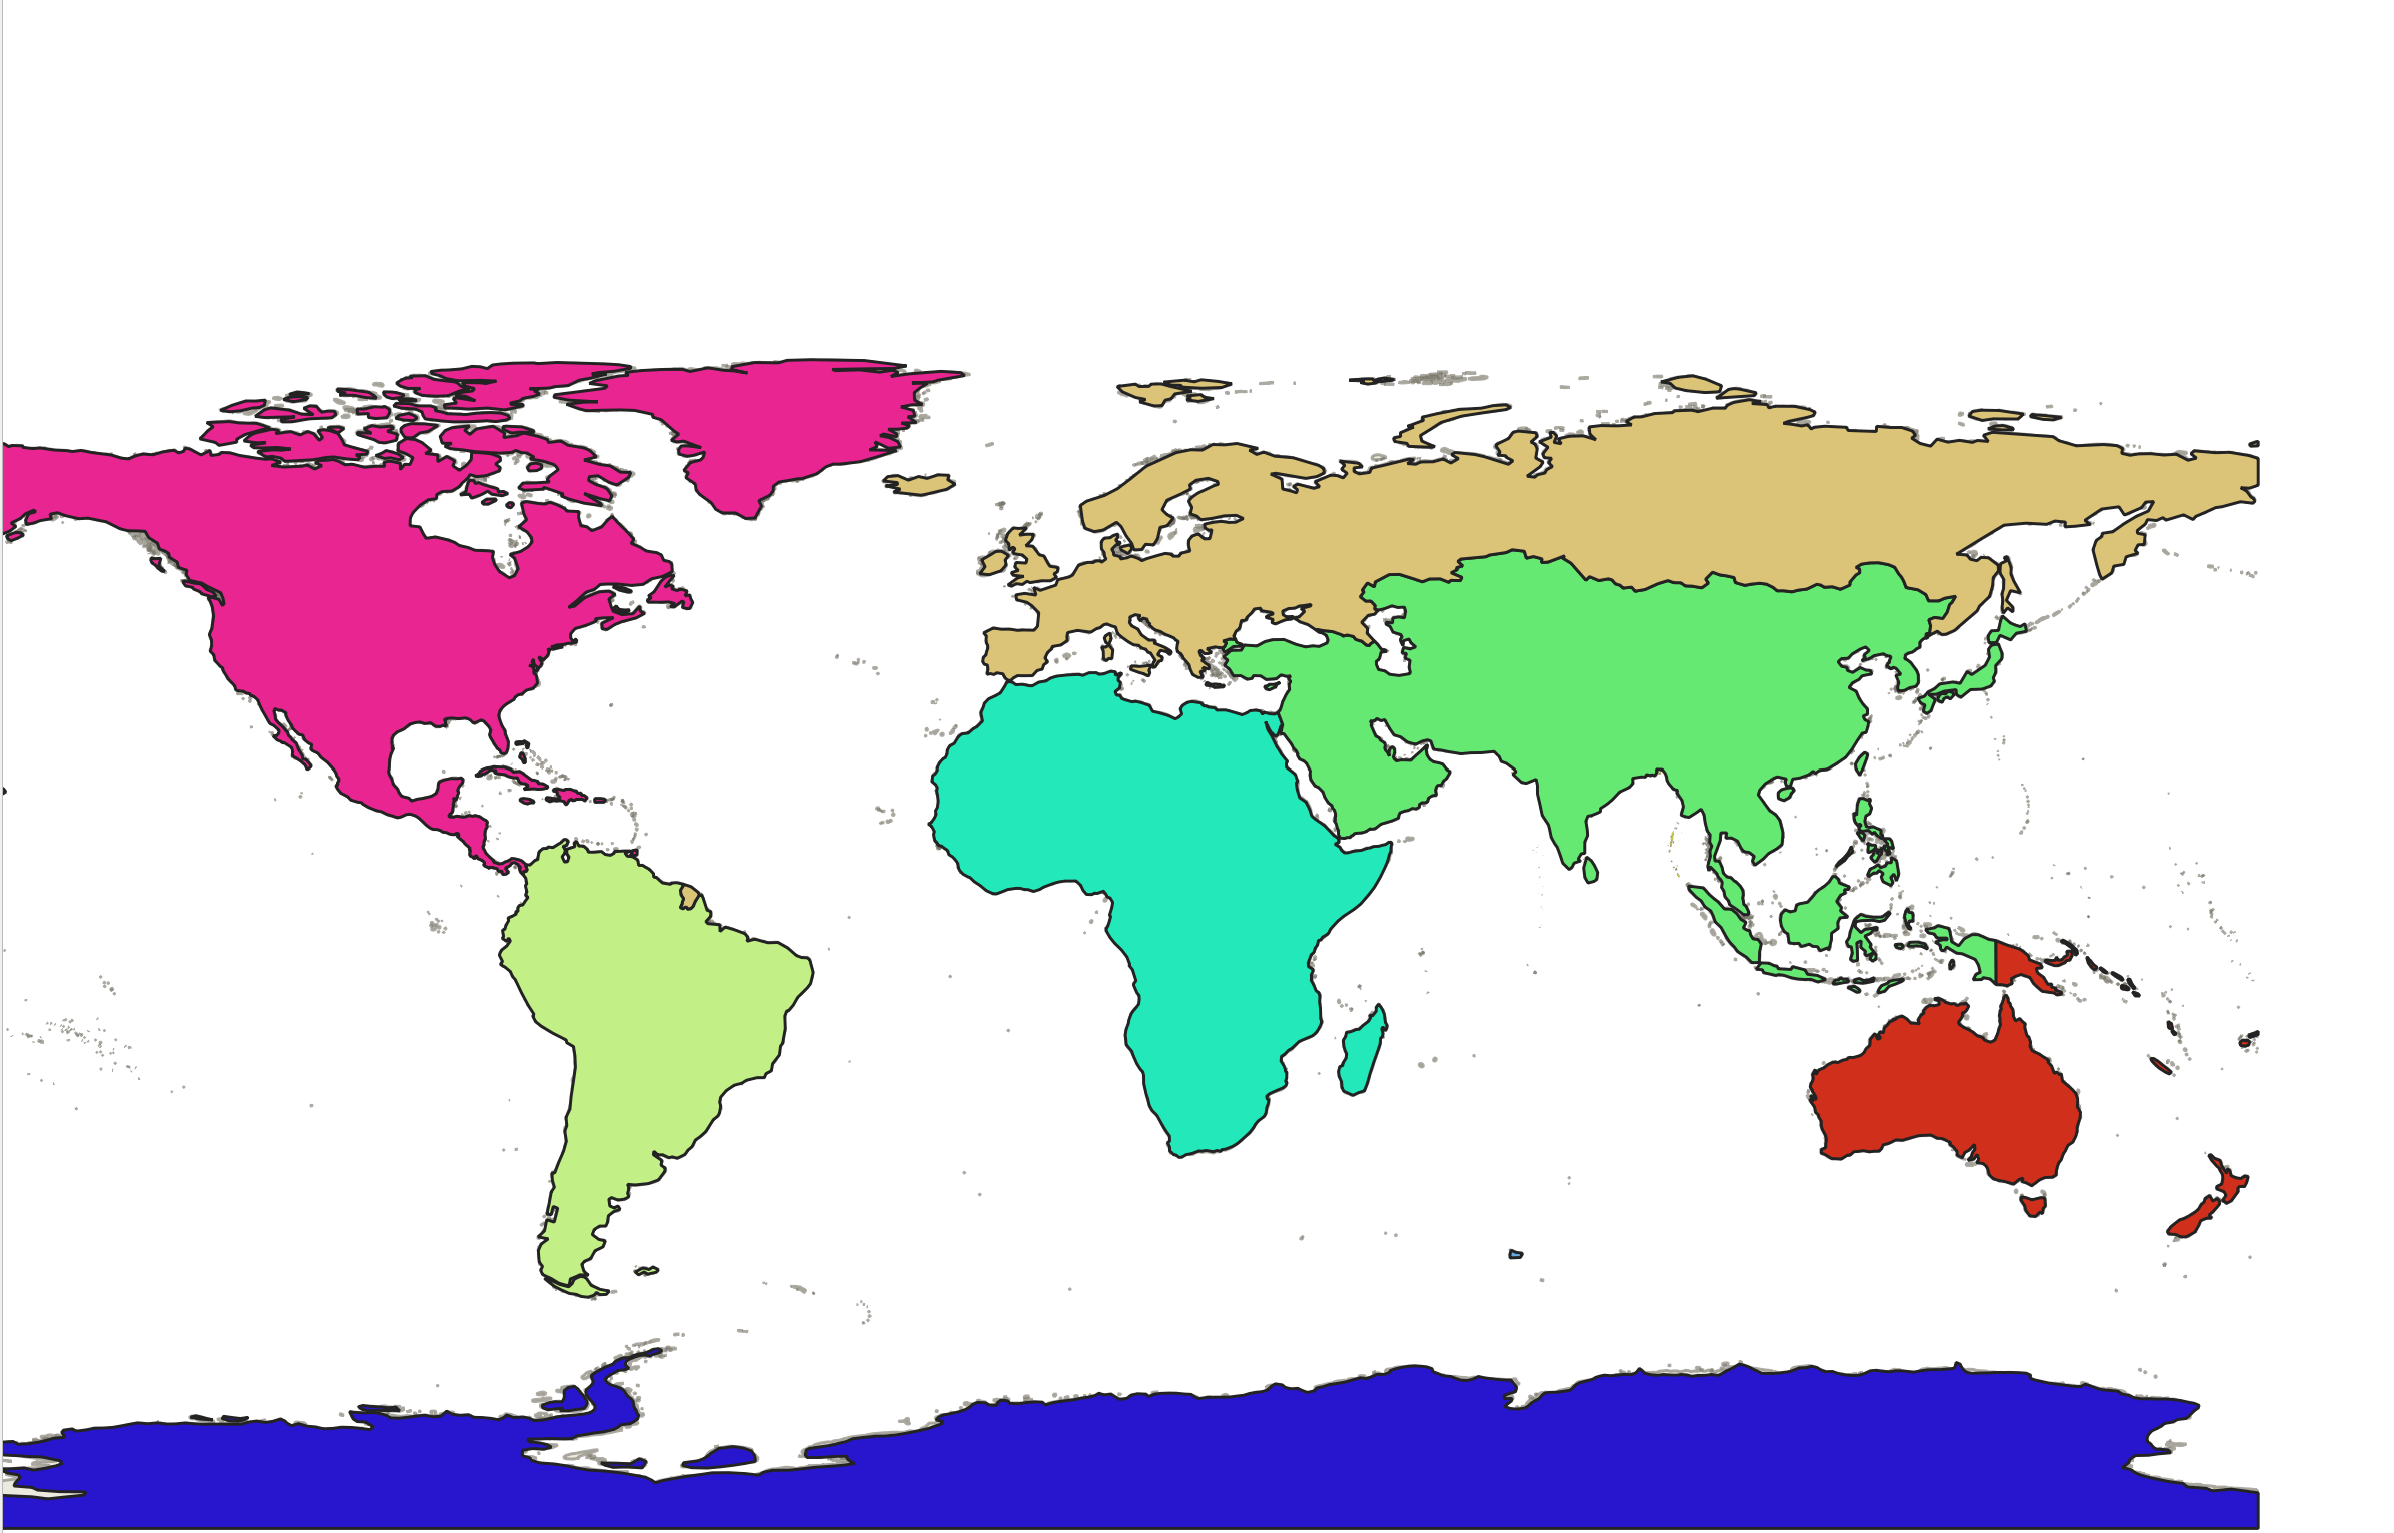